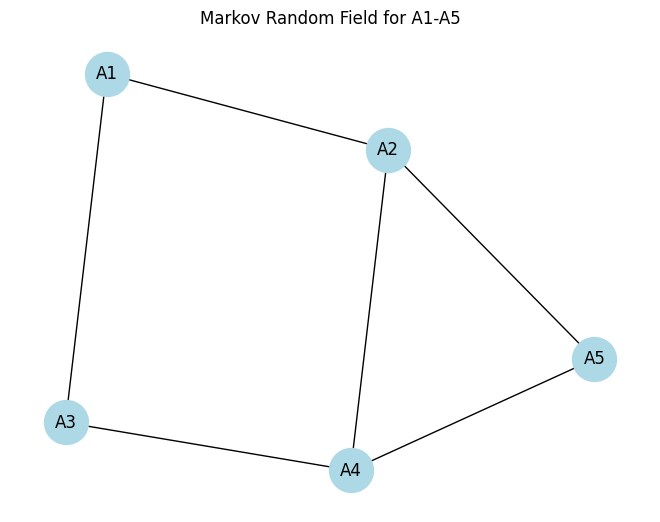

Most probable (MAP) configuration: {'A1': -1, 'A2': -1, 'A3': -1, 'A4': -1, 'A5': -1}
Probability: 0.45903892129649454
Cliques: [('A1', 'A2'), ('A1', 'A3'), ('A2', 'A4'), ('A2', 'A5'), ('A3', 'A4'), ('A4', 'A5')]


In [ ]:
# a)

import itertools
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

edges = [("A1", "A2"), ("A1", "A3"), ("A2", "A4"),
         ("A2", "A5"), ("A3", "A4"), ("A4", "A5")]

G = nx.Graph()
G.add_edges_from(edges)

pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=1000, font_size=12)
plt.title("Markov Random Field for A1-A5")
plt.show()

states = list(itertools.product([-1, 1], repeat=5))
vars = ["A1", "A2", "A3", "A4", "A5"]

def energy(state):
    mapping = dict(zip(vars, state))
    e = sum(mapping[i] * mapping[j] for i, j in edges)
    return e

probs = np.array([np.exp(energy(s)) for s in states])
probs /= probs.sum()

max_idx = np.argmax(probs)
best_state = dict(zip(vars, states[max_idx]))

print("Most probable (MAP) configuration:", best_state)
print("Probability:", probs[max_idx])

print("Cliques:", edges)